---
# Question 1
1. Read in the provided ACW Data using the CSV library. 
---

In [100]:
# importing all needed library
import csv
import json
import random
import matplotlib as mpl
# import pandas, seaborn and matplot library
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline


In [101]:
# reading the Acw data
with open('acw_user_data.csv') as user_data:
    user_csv = csv.reader(user_data, delimiter=",")
    for line_no,line in enumerate(user_csv):  #going through the data heading
        if line_no == 0:
            heading = line

#this shows the heading of the awc_user data
print(heading) 

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


# Question 2
    Convert all flat structures into nested structures
---

In [102]:
#function to convert flat structures in to nested structures 
def get_nested(row):
    users_info = {}
    address_info = {} #the users street,postcode and city is is stored to this empty list
    vehicle_info = {} # the users vechicle make,model,year and type is stored into this dictionary list
    creditcard_info = {}# the users credit card information is stored here
    vehicle_detail =[]
    address_detail = []
    creditcard_detail = []
    users_info['first_name'] = row['First Name']#variable name change
    users_info['second_name'] = row['Last Name']#variable name change
    users_info['age'] = int(row['Age (Years)'])#variable name and type change
    users_info['sex'] = row['Sex']#variable name change
    users_info['marital_status'] = row['Marital Status']
    users_info['commute_distance'] = float(row['Distance Commuted to Work (miles)']) #variable name and type change
    users_info['pension'] = float(row['Yearly Pension (GBP)']) #variable name and type change
    users_info['salary'] = float(row['Yearly Salary (GBP)']) #variable name and type change
    users_info['company'] = row['Employer Company']
    #keeping retired data variable type the same as given data value
    retire = row['Retired']  
    if retire == "True":
        users_info['retired'] = True
    else:
        users_info['retired'] = False
    #assigning street , postcode and city to address as properties
    address_info['street'] = row['Address Street']#variable name change
    address_info['city'] = row['Address City']#variable name change
    address_info['postcode'] = row['Address Postcode']#variable name change
    #adding address details to a list
    address_detail.append(address_info)
    #inserting all address detail row to user information
    users_info["Address"] = address_detail

    #assigning card details 
    creditcard_info['start_date'] = row['Credit Card Start Date'] #variable name change
    creditcard_info['end_date'] = row['Credit Card Expiry Date']#variable name change
    creditcard_info['number'] = int(row['Credit Card Number'])#variable name and type change
    creditcard_info['ccv'] = int(row['Credit Card CVV'])#variable name and type change
    creditcard_info['iban'] = row['Bank IBAN'] #variable name change
    #adding card details to a nested list
    creditcard_detail.append(creditcard_info)

    #inserting all card information to user detals
    users_info['Creadit Card'] = creditcard_detail

    #assigning vehicle details
    vehicle_info['make'] = row['Vehicle Make']#variable name change
    vehicle_info['model'] = row['Vehicle Model']#variable name change
    vehicle_info['year'] = int(row['Vehicle Year']) #variable name and type change
    vehicle_info['model'] = row['Vehicle Type'] #variable name change
    #adding vehicle details to a  vehicle list
    vehicle_detail.append(vehicle_info)

    #inserting all vehicle information to user detals
    users_info['Vehicle'] = vehicle_detail
    return users_info


### Function for csv file opening
---

In [103]:
# this is the path where the used data is stored
data_path = 'acw_user_data.csv' 
#function to open a csv file, and returns the read data
def csv_opening(data_path):
    user_data = open(data_path,'r')
    user_reader = csv.DictReader(user_data)
    return user_reader

## Question2 continuation

In [104]:
# opening csv file
user_reader = csv_opening(data_path)
sorted_data  = []
# type(user_reader)
for row in user_reader:
    data_info = get_nested(row)#using the predefined function to get nested
    sorted_data.append(data_info)

---
## Question 3
---

In [105]:
dependant_column =[]
with open('acw_user_data.csv') as user_data:
    user_reader = csv.DictReader(user_data)
    for index,column in enumerate(user_reader):
        try:
            column['dependant'] = int(column['Dependants'])
        except:
            dependant_column.append(index)
            column['dependant'] = 0
print("Problematic rows for dependants:", dependant_column)

Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


---
## Question 4
---

In [106]:
#writing the csv in json file
with open('processed.json','w') as js:
    json.dump(sorted_data, js, indent=2)
    js.close()

---
# Function for writing a Json file
---

In [107]:
#function for writing a json file
def create_json(name_json,result):
    with open (name_json,'w') as json_file:
        json.dump(result, json_file, indent=2)
        json_file.close()

---
## Question 5a
---

In [138]:
#creating Retired Json file 
retired_index = []  #this empty list stores all retired index data
for index,row in enumerate(sorted_data): 
    if row['retired']== True:
        retired_index.append(index)

#Get all the data index and save it to the empty list
retired_data = []
for r in retired_index:
    retired_info = sorted_data[r]#stores all the collected value in the variable
    retired_data.append(retired_info) # put all data to the empty list

#the function defined is called to write the retired data in to the a json file
create_json('retired.json',retired_data) 

### Question 5b

In [109]:
#create  Employed Json file
employee_index = []
for row_no, row in enumerate(sorted_data):
    if row['company'] !="N/A":
        employee_index.append(row_no)

employee_data = []        
for emp in employee_index:
    employee_info = sorted_data[emp]
    employee_data.append(employee_info)
#the function defined is called to write the employee data in to the a json file    
create_json('employed.json',employee_data)

---
# Question 6
---

In [110]:
#get card start and end date
#change the data type of both date to int
#get the difference of both
#flag the result

# define a function for getting the the difference
def ccard_flag (output):
    ccard_start = int(output['Credit Card Start Date'][-2:])
    ccard_end =int(output['Credit Card Expiry Date'][-2:])
    ccard_diff = ccard_end -ccard_start
    #get the difference and check if it is greater than 
    if ccard_diff >= 10:
        flag_output =True
    else:
        flag_output=False
    return flag_output


## Question 6a

In [111]:
#open aws_user csv file
csv_read =csv_opening(data_path)

flagged_result = []  #takes a list of person that has more than 10 years between start and end date

#lopping through the csv file 
for f in csv_read:
    flagged = ccard_flag(f)
    #get the flag person with greater difference from start and end date
    if flagged == True:  
        f["flag"] = flagged
        flagged_result.append(f)


# get all flag result and save it remove json file
create_json('remove_ccard.json',flagged_result)

---
# Question 7a
---

In [112]:
#loading the processed json file
with open('processed.json', 'r') as process:
    processed_data = json.load(process)
commute_list =[] # empty list for salary commute

# get salary data and commute data
for row in processed_data:
    mile = row['commute_distance']
    salary =row['salary']
    if mile > 1:
        row["salary_commute"] = round((salary/mile),2) 
    else:
        row['salary_commute'] = round(salary,2) # assigning and rounding salary commute to 2place number 
    commute_list.append(row)
# print(commute_list[2])

---
# Question 7b
---

In [113]:
#sorting commute list
sorted(commute_list, key=lambda c:c['salary_commute'], reverse=True)

[{'first_name': 'Stephanie',
  'second_name': 'Butler',
  'age': 87,
  'sex': 'Female',
  'marital_status': 'married or civil partner',
  'commute_distance': 0.0,
  'pension': 46117.0,
  'salary': 98596.0,
  'company': 'N/A',
  'retired': True,
  'Address': [{'street': 'Flat 10 Slater port',
    'city': 'Lake Arthur',
    'postcode': 'W5 4RU'}],
  'Creadit Card': [{'start_date': '05/13',
    'end_date': '02/20',
    'number': 213137758587920,
    'ccv': 661,
    'iban': 'GB06BBVM35013832455205'}],
  'Vehicle': [{'make': 'Mercedes-Benz', 'model': 'Coupe', 'year': 2002}],
  'salary_commute': 98596.0},
 {'first_name': 'Sian',
  'second_name': 'Hayes',
  'age': 89,
  'sex': 'Female',
  'marital_status': 'single',
  'commute_distance': 0.0,
  'pension': 10639.0,
  'salary': 97886.0,
  'company': 'N/A',
  'retired': True,
  'Address': [{'street': '840 Webb forge',
    'city': 'Port Francescatown',
    'postcode': 'E2 2QX'}],
  'Creadit Card': [{'start_date': '10/18',
    'end_date': '10/19',

---
# Question 7c
---

In [114]:
#creating commute json file using the pre-defined function for writing to json
create_json('commute.json',commute_list)

---
# Data Visualisation
---

### Question 1 
---

In [115]:

#load data to data frame
dataFrame = pd.read_csv(data_path)

#print heading
dataFrame.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

---
### Question 1a and 1b
---

In [116]:
median_age = dataFrame['Age (Years)'].median()  # median  for age
mean_salary = dataFrame['Yearly Salary (GBP)'].mean() # mean for salary
print(f"The mean is {mean_salary:.2f} for Salary records") 
print(f"The median is {median_age} for Age records")

The mean is 57814.08 for Salary records
The median is 54.0 for Age records


---
### Question 2a
---

Text(0.5, 1.0, 'Distribution of Employee Age(Years)')

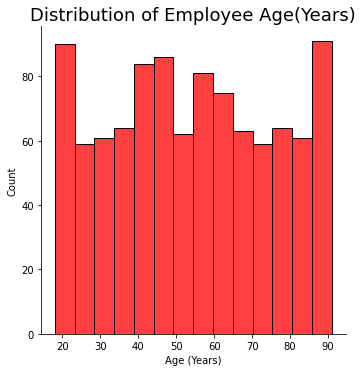

In [117]:
#  calculating how many bins would be required for a bin_width of 5
age_min = dataFrame['Age (Years)'].min()
age_max = dataFrame['Age (Years)'].max()
bins_num =(age_max-age_min)//5
bins_num
#Distribution of Employee Age
age_plt=sns.displot(data=dataFrame,x='Age (Years)',bins=bins_num, color='red')
plt.title('Distribution of Employee Age(Years)',fontsize=18)

---
## Question 2b
     Distribution using Employee dependants
---

Text(0.5, 1.0, 'Distribution of Employee dependants')

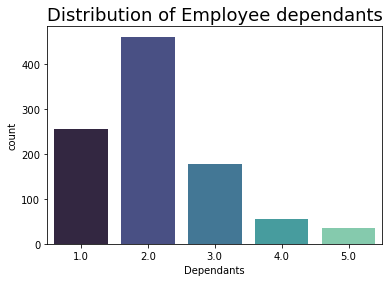

In [118]:
#distribution plot for employee dependants
depend_plt = sns.countplot(data=dataFrame,x='Dependants',palette="mako")
depend_plt.set_title("Distribution of Employee dependants",fontsize=18)

---
# Question 2c
    Distribution for Employee age using marital status as condtion
---

Text(0.5, 1.0, 'Distribution of Employee age with marital status')

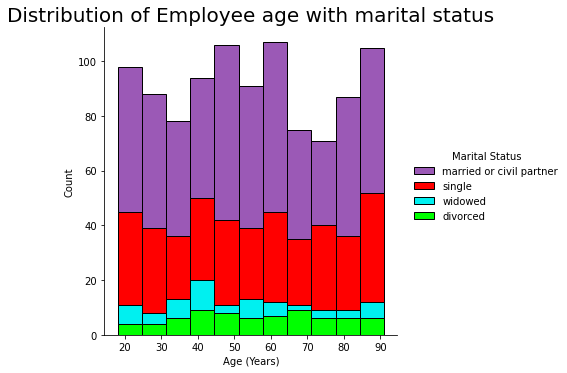

In [137]:
#distribution plot for employee age with condition marital status
ageSta_plt =sns.displot(data=dataFrame, x= 'Age (Years)',hue='Marital Status',
                        palette=["#9b59b6", "#ff0000", "#00f0f0", "#00ff00"],
                         multiple="stack", alpha=1
                       )
plt.title("Distribution of Employee age with marital status",fontsize=20)


---
# Question 3 
Perform multivariate plots with the following data attributes
1. Commuted distance against salary.
2. Age against Salary
3. Age against Salary conditioned by Dependants 

---

Text(0.5, 1.0, 'Distribution of Employee Distance Commuted to Work (miles) Vs Salary')

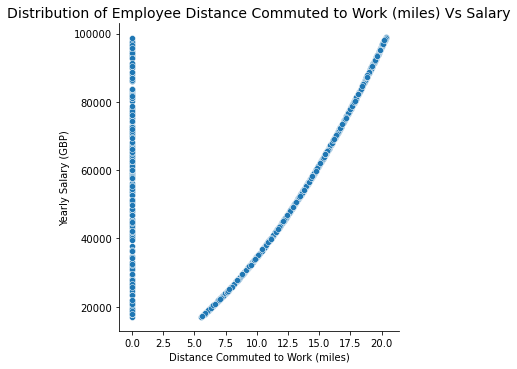

In [120]:
#commuted distance against salary
salarydis_plt = sns.relplot(data=dataFrame, x='Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')
plt.title("Distribution of Employee Distance Commuted to Work (miles) Vs Salary",fontsize=14)

Text(0.5, 1.0, 'Distribution of Employee Age Vs Salary')

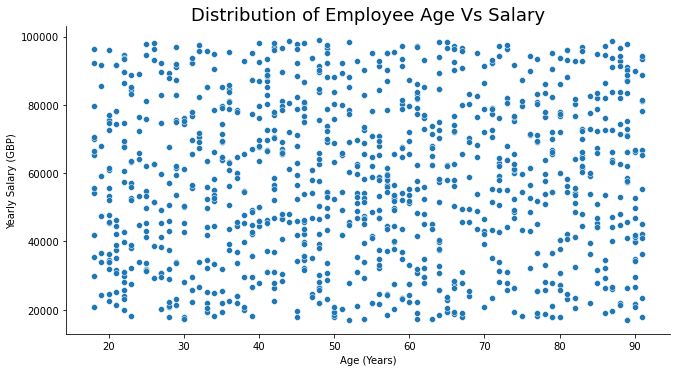

In [133]:
#Question 3b
#distribution plot for employee age against salary
salaryage_plt = sns.relplot(data=dataFrame, x='Age (Years)',y="Yearly Salary (GBP)",aspect=1.9)
plt.title("Distribution of Employee Age Vs Salary",fontsize=18)

Text(0.5, 1.0, 'Distribution of Employee Age Vs Salary with dependants condition')

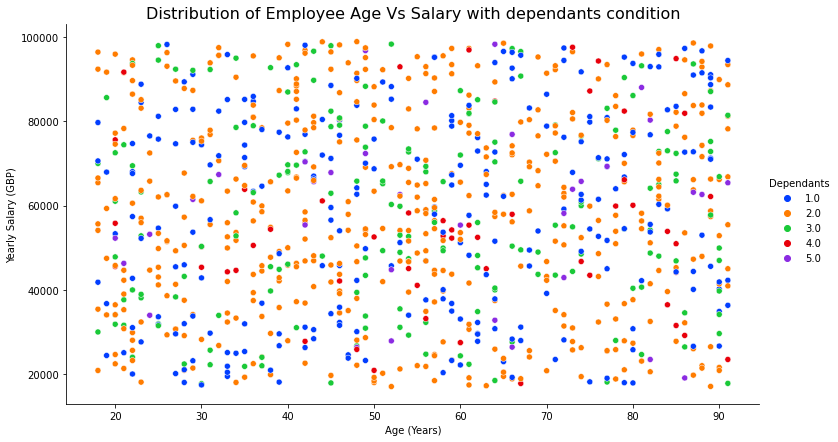

In [129]:
#distribution plot for employee age against salary with condition dependant
ageDepsal_plt=sns.relplot(data=dataFrame, x='Age (Years)',y="Yearly Salary (GBP)",hue="Dependants", palette="bright",height=6,aspect=1.8)
plt.title("Distribution of Employee Age Vs Salary with dependants condition",fontsize=16)

---
# Question 4
---

In [130]:

#create empty dictionary to save figures 
figures_to_save = {}
#inserting plots to empty defined dictionary
figures_to_save["./age_univarent.png"] = age_plt#Distribution of Employee Age
figures_to_save["./depend_univarent.png"] = depend_plt #distribution plot for employee dependants 
figures_to_save["./ageStatus_plt.png"] = ageSta_plt #distribution plot for employee age with condition marital status
figures_to_save["./salaryDistance_plt.png"]= salarydis_plt#distribution plot for employee commuted distance against salary
figures_to_save["./salaryAge_plt.png"]= salaryage_plt#distribution plot for employee age against salary
figures_to_save["./ageDepsal_plt.png"]= ageDepsal_plt#distribution plot for employee age against salary with condition dependant

In [131]:
# create a function to save 
for key,value in figures_to_save.items():
    value.figure.savefig(key)
   
